<a href="https://colab.research.google.com/github/Winonymous/DataFest2023/blob/main/Datathon_EDA_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install the neccessary Libraries

In [ ]:
!pip install country-converter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.1 MB/s eta 0:00:00


# Import the Neccessary Libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

# Import the Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datathon/Fraud Detection Dataset.csv")
df.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,...,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,...,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,...,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,...,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1
3,44108303,9012,565.89,2021-02-27 11:31:00,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,...,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1
4,66622683,5185,955.49,2022-09-24 04:06:38,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,...,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1


# Great Functions

In [ ]:
def get_classpercentage(df, Class, Subject, sort_values = False):
  returndataset = df.groupby([Class])[Subject].value_counts() # Get all the value count of all the fraudulent transaction
  returndataset = returndataset.unstack().reset_index() # Convert it to a dataframe
  returndataset.set_index(Class, inplace=True)
  returndataset['Percentage'] = returndataset.apply(lambda x: round((x[0] / (x[0] + x[1])) * 100, 2), axis = 1) # Get the percentage fraudulent
  if sort_values:
    return returndataset.sort_values('Percentage', ascending = False)
  else:
    return returndataset

In [ ]:
def ExploreCategorical(df, Column):
  numberofunique = df[Column].nunique()
  print(f"The Number unique varables are {numberofunique}")
  uniqueparts = df[Column].unique()
  print(f"The unique varables are {uniqueparts}")
  df[Column].value_counts().plot(kind = 'barh')
  plt.title("The Value Counts for each category")
  plt.show()
  Fradulentpertype = get_classpercentage(df, Column, 'Fraudulent Flag', sort_values = True)
  display(Fradulentpertype.head())
  display(Fradulentpertype.tail())
  Fradulentpertype[:40]['Percentage'].plot(kind = "barh")
  plt.title("The Percentage Fradulent")
  plt.show()

#  Explore  the data

## Basic understanding of the whole Dataset

Lets get a general view of the whole datasets datatype

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 32 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Transaction ID                     int64  
 1   User ID                            int64  
 2   Transaction Amount                 float64
 3   Transaction Date and Time          object 
 4   Merchant ID                        int64  
 5   Payment Method                     object 
 6   Country Code                       object 
 7   Transaction Type                   object 
 8   Device Type                        object 
 9   IP Address                         object 
 10  Browser Type                       object 
 11  Operating System                   object 
 12  Merchant Category                  object 
 13  User Age                           int64  
 14  User Occupation                    object 
 15  User Income                        float64
 16  User Gender       

Let's get basic description of the dataset

In [ ]:
df.describe()

,Transaction ID,User ID,Transaction Amount,Merchant ID,User Age,User Income,Location Distance,Time Taken for Transaction,User's Transaction History,Merchant's Reputation Score,User's Credit Score,Merchant's Business Age,Fraudulent Flag
count,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06
mean,5.501906e+07,5.499571e+03,5.005515e+02,5.500817e+03,4.900159e+01,5.049328e+04,5.050600e+01,3.049492e+01,5.048393e+01,2.999382e+00,5.749533e+02,1.049685e+01,4.999843e-01
std,2.598067e+07,2.598744e+03,2.884166e+02,2.598350e+03,1.818538e+01,2.858223e+04,2.857562e+01,1.703567e+01,2.886705e+01,1.154479e+00,1.590197e+02,5.764884e+00,5.000000e-01
min,1.000004e+07,1.000000e+03,1.000000e+00,1.000000e+03,1.800000e+01,1.000020e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+02,1.000000e+00,0.000000e+00
25%,3.251666e+07,3.248000e+03,2.507900e+02,3.251000e+03,3.300000e+01,2.573446e+04,2.576000e+01,1.574000e+01,2.500000e+01,2.000000e+00,4.370000e+02,5.000000e+00,0.000000e+00
50%,5.502987e+07,5.499000e+03,5.005100e+02,5.501000e+03,4.900000e+01,5.050294e+04,5.051000e+01,3.050000e+01,5.000000e+01,3.000000e+00,5.750000e+02,1.000000e+01,0.000000e+00
75%,7.752487e+07,7.751000e+03,7.504400e+02,7.752000e+03,6.500000e+01,7.523454e+04,7.525000e+01,4.526000e+01,7.500000e+01,4.000000e+00,7.130000e+02,1.500000e+01,1.000000e+00
max,9.999988e+07,9.999000e+03,1.000000e+03,9.999000e+03,8.000000e+01,1.000000e+05,1.000000e+02,6.000000e+01,1.000000e+02,5.000000e+00,8.500000e+02,2.000000e+01,1.000000e+00


In [ ]:
df.isna().sum()

Transaction ID                       0
User ID                              0
Transaction Amount                   0
Transaction Date and Time            0
Merchant ID                          0
Payment Method                       0
Country Code                         0
Transaction Type                     0
Device Type                          0
IP Address                           0
Browser Type                         0
Operating System                     0
Merchant Category                    0
User Age                             0
User Occupation                      0
User Income                          0
User Gender                          0
User Account Status                  0
Transaction Status                   0
Location Distance                    0
Time Taken for Transaction           0
Transaction Time of Day              0
User's Transaction History           0
Merchant's Reputation Score          0
User's Device Location               0
Transaction Currency     

<ipython-input-22-9ec3e5aa565b>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)


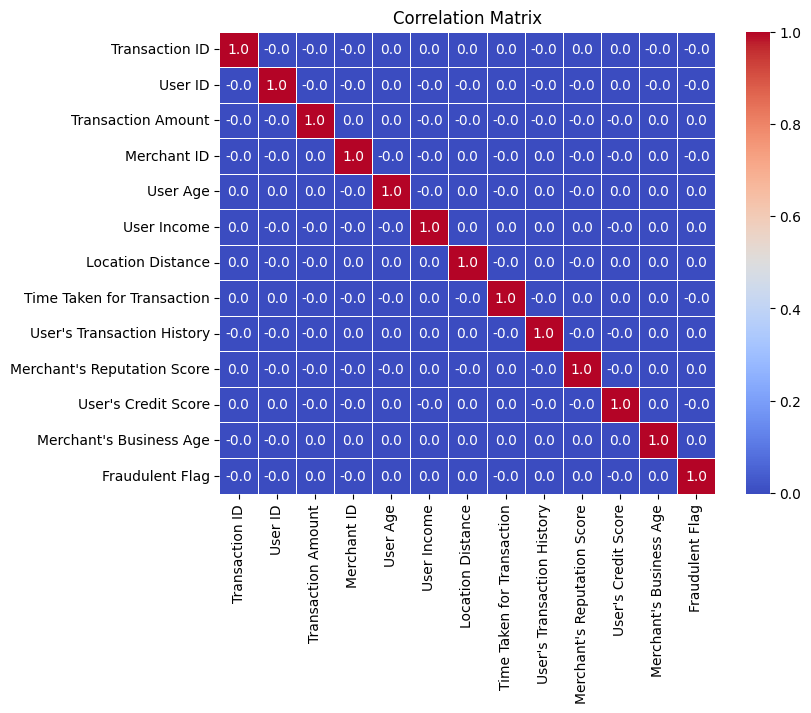

In [ ]:
# Set up the figure and axis
plt.figure(figsize=(8, 6))

# Create a heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)

# Set the plot title
plt.title('Correlation Matrix')

# Display the plot
plt.show()

## Payment Method

In [ ]:
nunique = df['Payment Method'].nunique()

print(f"The dataset contain {nunique} unique payment methods")

The dataset contain 40 unique payment methods


(149000.0, 151000.0)

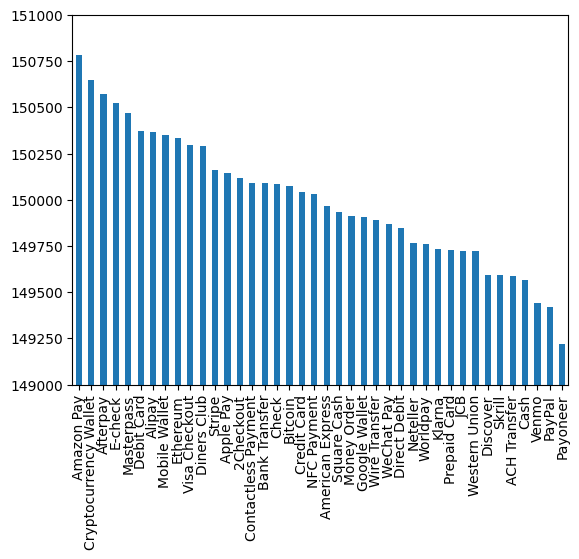

In [ ]:
PaymentMethod = df['Payment Method'].value_counts()
PaymentMethod.plot(kind = 'bar')
plt.ylim(149000, 151000)

Most of the transactions were done using AmazonPay


In [ ]:
Fraudflagperpaymentmethod = df.groupby(['Payment Method'])['Fraudulent Flag'].value_counts() # Get all the value count of all the fraudulent transaction
Fraudflagperpaymentmethod = Fraudflagperpaymentmethod.unstack().reset_index() # Convert it to a dataframe
Fraudflagperpaymentmethod.set_index('Payment Method', inplace=True)
Fraudflagperpaymentmethod['Percentage Fraudulent'] = Fraudflagperpaymentmethod.apply(lambda x: round((x[0] / (x[0] + x[1])) * 100, 2), axis = 1) # Get the percentage fraudulent
Fraudflagperpaymentmethod

Fraudulent Flag,0,1,Percentage Fraudulent
Payment Method,,,
2Checkout,75292,74823,50.16
ACH Transfer,74652,74934,49.91
Afterpay,75347,75223,50.04
Alipay,75293,75073,50.07
Amazon Pay,75327,75454,49.96
American Express,74794,75170,49.87
Apple Pay,74916,75227,49.90
Bank Transfer,74923,75165,49.92
Bitcoin,74733,75343,49.80


(49.0, 50.0)

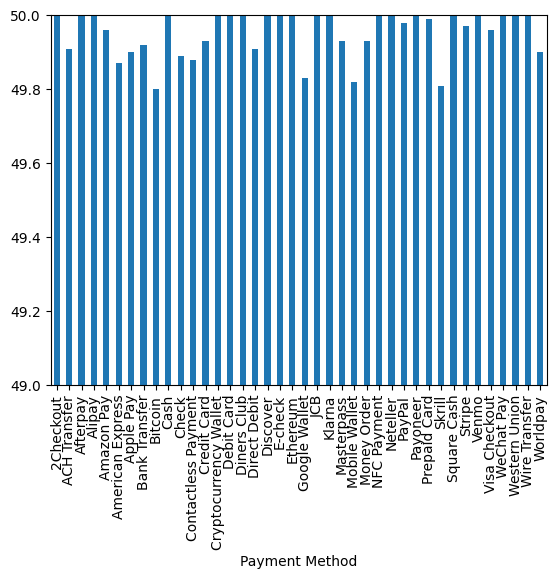

In [ ]:
Fraudflagperpaymentmethod['Percentage Fraudulent'].plot(kind = "bar")
plt.ylim(49, 50)

Fraudulent Transaction occur equally on all part. Mostly around 50%

Since there are not real thrends the best thing to do is label encode them

## Transaction Amount

<Axes: >

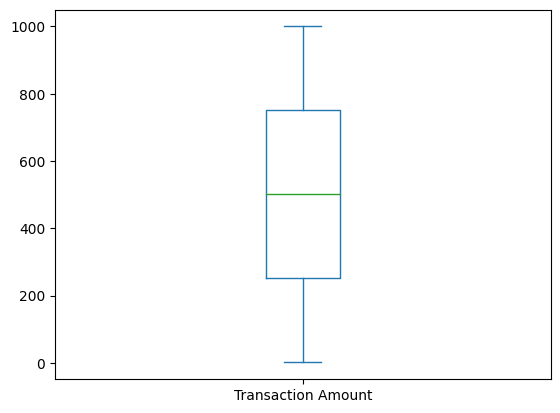

In [ ]:
df['Transaction Amount'].plot(kind = 'box')

In [ ]:
sns.catplot(data=df, x="Fraudulent Flag", y="Transaction Amount", kind="swarm")

There are no outliers in the transactions and Fraudulent transactions do not occur at one moment more than the other.

## Transaction Date and Time

In [ ]:
df_datetimeinfo = pd.DataFrame()
df_datetimeinfo['Fraudulent Flag'] = df['Fraudulent Flag']

df['Transaction Date and Time'] = pd.to_datetime(df['Transaction Date and Time'])
df['Transaction Date and Time'].head()

0   2023-01-02 07:47:54
1   2021-09-12 15:15:41
2   2023-01-12 17:25:58
3   2021-02-27 11:31:00
4   2022-09-24 04:06:38
Name: Transaction Date and Time, dtype: datetime64[ns]

In [ ]:
df_datetimeinfo['Year'] = df['Transaction Date and Time'].dt.year
df_datetimeinfo['Month'] = df['Transaction Date and Time'].dt.month
df_datetimeinfo['day'] = df['Transaction Date and Time'].dt.day
df_datetimeinfo['hour'] = df['Transaction Date and Time'].dt.hour
df_datetimeinfo['Minute'] = df['Transaction Date and Time'].dt.minute
df_datetimeinfo['Second'] = df['Transaction Date and Time'].dt.second
df_datetimeinfo.head()

,Fraudulent Flag,Year,Month,day,hour,Minute,Second
0,0,2023,1,2,7,47,54
1,1,2021,9,12,15,15,41
2,1,2023,1,12,17,25,58
3,1,2021,2,27,11,31,0
4,1,2022,9,24,4,6,38


### Year

<Axes: >

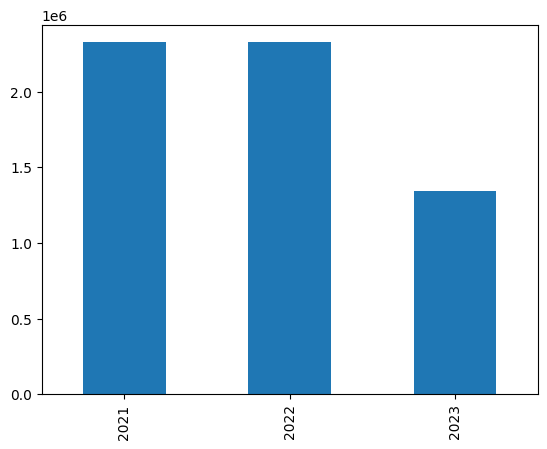

In [ ]:
df_datetimeinfo['Year'].value_counts().plot(kind = 'bar')

It is obvious that the amount of transactions that occur every year are quite similar

In [ ]:
FradulentperYear = get_classpercentage(df_datetimeinfo, 'Year', 'Fraudulent Flag')
FradulentperYear

Fraudulent Flag,0,1,Percentage
Year,,,
2021,1164430,1163954,50.01
2022,1163794,1163832,50.00
2023,671870,672120,49.99


<Axes: xlabel='Year'>

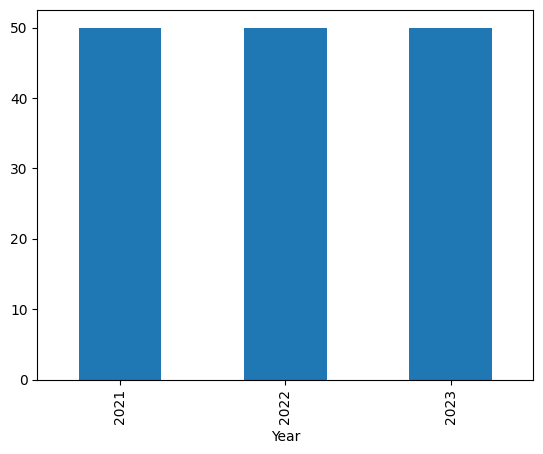

In [ ]:
FradulentperYear['Percentage'].plot(kind = 'bar')

### Month

In [ ]:
FradulentperMonth = get_classpercentage(df_datetimeinfo, 'Month', 'Fraudulent Flag')
FradulentperMonth

Fraudulent Flag,0,1,Percentage
Month,,,
1,295862,296615,49.94
2,267562,267357,50.02
3,296672,296760,49.99
4,287647,287853,49.98
5,297520,297098,50.04
6,286454,287452,49.91
7,293519,291929,50.14
8,197456,197630,49.98
9,191020,191468,49.94


<Axes: xlabel='Month'>

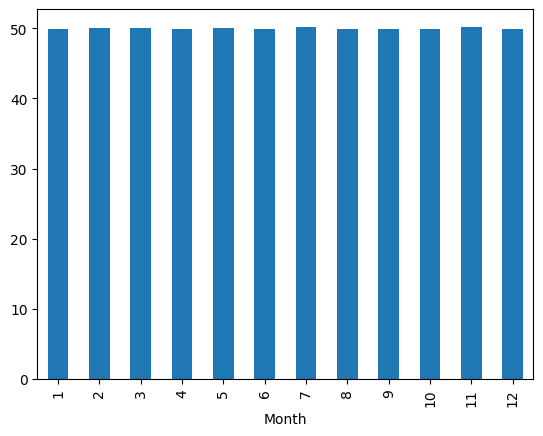

In [ ]:
FradulentperMonth['Percentage'].plot(kind = 'bar')

### Day

In [ ]:
Fradulentperday = get_classpercentage(df_datetimeinfo, 'day', 'Fraudulent Flag')
Fradulentperday

Fraudulent Flag,0,1,Percentage
day,,,
1,98426,99028,49.85
2,98451,97971,50.12
3,98916,98577,50.09
4,98581,98871,49.93
5,98531,98985,49.89
6,98637,98779,49.96
7,98834,98835,50.00
8,98922,98375,50.14
9,99686,99198,50.12


<Axes: xlabel='day'>

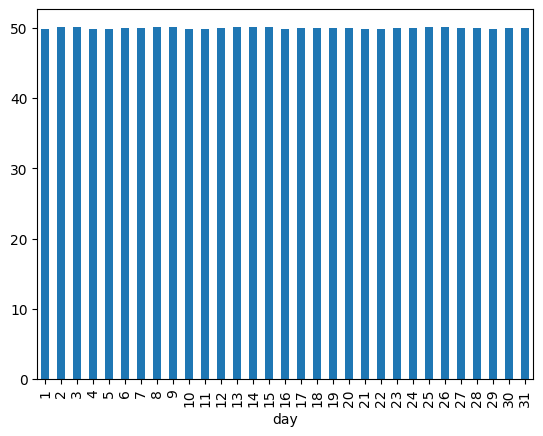

In [ ]:
Fradulentperday['Percentage'].plot(kind = 'bar')

### Hour

In [ ]:
Fradulentperhour = get_classpercentage(df_datetimeinfo, 'hour', 'Fraudulent Flag')
Fradulentperhour

Fraudulent Flag,0,1,Percentage
hour,,,
0,124791,125849,49.79
1,125188,124367,50.16
2,124865,124926,49.99
3,125279,125769,49.90
4,124831,125119,49.94
5,124935,124714,50.04
6,124884,125306,49.92
7,125572,124918,50.13
8,124871,124893,50.00


<Axes: xlabel='hour'>

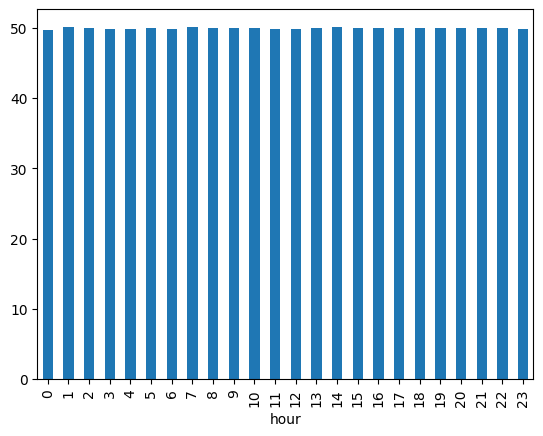

In [ ]:
Fradulentperhour['Percentage'].plot(kind = 'bar')

### Minute

In [ ]:
FradulentperMin = get_classpercentage(df_datetimeinfo, 'Minute', 'Fraudulent Flag')
FradulentperMin

Fraudulent Flag,0,1,Percentage
Minute,,,
0,49871,50311,49.78
1,50087,49975,50.06
2,49933,50171,49.88
3,50258,50046,50.11
4,50097,50083,50.01
5,50319,49722,50.30
6,49788,50442,49.67
7,50078,50053,50.01
8,50215,50092,50.06


<Axes: xlabel='Minute'>

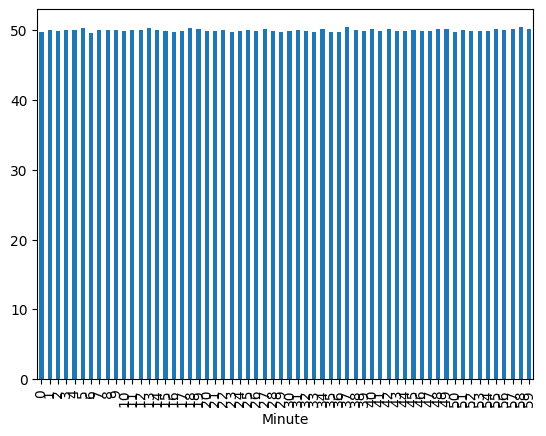

In [ ]:
FradulentperMin['Percentage'].plot(kind = 'bar')

NO real information there so I will drop it

## Merchant ID

In [ ]:
df['Merchant ID'].nunique()

9000

In [ ]:
FradulentperMerchant = get_classpercentage(df, 'Merchant ID', 'Fraudulent Flag')
FradulentperMerchant.head()

Fraudulent Flag,0,1,Percentage
Merchant ID,,,
1000,334,341,49.48
1001,337,333,50.30
1002,353,322,52.30
1003,327,330,49.77
1004,330,315,51.16


In [ ]:
FradulentperMerchant = FradulentperMerchant.sort_values('Percentage', ascending = False)
FradulentperMerchant.head()

Fraudulent Flag,0,1,Percentage
Merchant ID,,,
5574,376,283,57.06
1743,369,278,57.03
1347,370,282,56.75
3480,387,297,56.58
9952,370,287,56.32


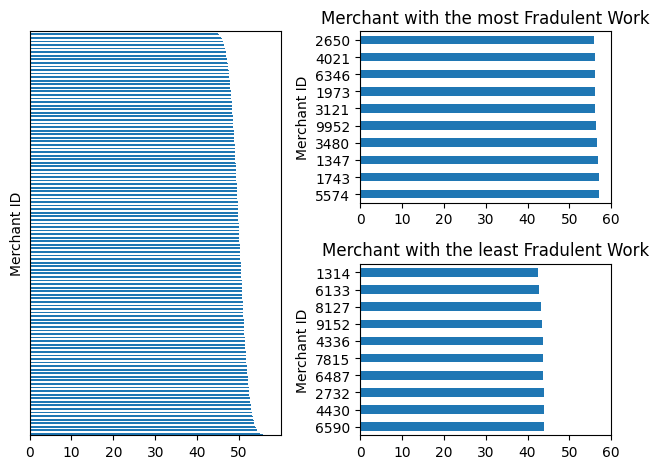

In [ ]:
fig = plt.figure()

axes1 = plt.subplot2grid((2, 2), (0, 0),
                         rowspan = 2)
FradulentperMerchant['Percentage'].plot(kind = 'barh', ax = axes1)
axes1.set_yticks([])

axes2 = plt.subplot2grid((2, 2), (0, 1))
FradulentperMerchant['Percentage'][:10].plot(kind = 'barh', ax = axes2)
axes2.set_title("Merchant with the most Fradulent Work")
axes2.set_xlim([0, 60])

axes3 = plt.subplot2grid((2, 2), (1, 1))
FradulentperMerchant['Percentage'][8990:].plot(kind = 'barh', ax = axes3)
axes3.set_title("Merchant with the least Fradulent Work")
axes3.set_xlim([0, 60])

fig.tight_layout()
plt.show()

WIll try to put the probablilty of the merchant being false has a new variable

## Country Code

In [ ]:
df['Country Code'].nunique()

40

<Axes: >

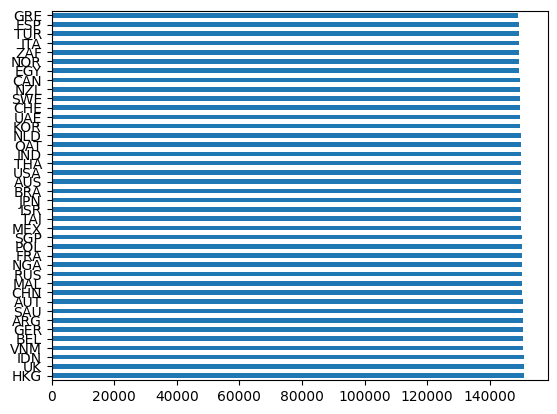

In [ ]:
df['Country Code'].value_counts().plot(kind = 'barh')

Similar transaction occur at every time

### Percentage of Fradulent Transaction in Each Country

In [ ]:
FradulentperCountry = get_classpercentage(df, 'Country Code', 'Fraudulent Flag', sort_values = True)
FradulentperCountry.head()

Fraudulent Flag,0,1,Percentage
Country Code,,,
JPN,75549,74510,50.35
NLD,75296,74533,50.25
SGP,75388,74739,50.22
ARG,75568,74928,50.21
ITA,74951,74387,50.19


In [ ]:
FradulentperCountry.tail()

Fraudulent Flag,0,1,Percentage
Country Code,,,
CHE,74565,75145,49.81
FRA,74709,75430,49.76
THA,74624,75341,49.76
BEL,74833,75700,49.71
SWE,74320,75252,49.69


NO real thrend here. Might Drop it

## Transaction Type

In [ ]:
df['Transaction Type'].nunique()

38

In [ ]:
df['Transaction Type'].unique()

array(['Charity', 'Cashback', 'Reward', 'Purchase', 'Acquisition',
       'Auction', 'Admission', 'Dividend', 'Recharge', 'Rental',
       'Donation', 'Royalty', 'Expense', 'Tax', 'Payout',
       'Registration Fee', 'Buyback', 'Rent', 'Interest', 'Withdrawal',
       'Gift', 'Settlement', 'Subscription', 'Payment', 'Bonus',
       'Transfer', 'Fine', 'Compensation', 'Contribution',
       'Reimbursement', 'Invoice', 'Refund', 'Investment',
       'Service Charge', 'Scholarship', 'Loan', 'Membership', 'Deposit'],
      dtype=object)

<Axes: >

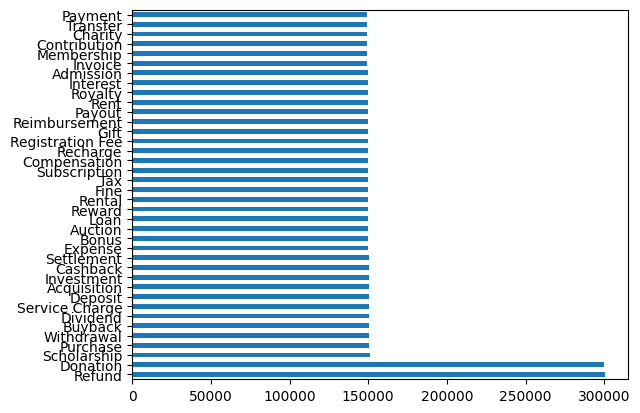

In [ ]:
df['Transaction Type'].value_counts().plot(kind = 'barh')

In [ ]:
FradulentperTransactiontype = get_classpercentage(df, 'Transaction Type', 'Fraudulent Flag', sort_values = True)
FradulentperTransactiontype.head()

Fraudulent Flag,0,1,Percentage
Transaction Type,,,
Payout,75348,74419,50.31
Deposit,75649,74815,50.28
Tax,75355,74639,50.24
Acquisition,75435,74922,50.17
Charity,74911,74462,50.15


In [ ]:
FradulentperTransactiontype.tail()

Fraudulent Flag,0,1,Percentage
Transaction Type,,,
Donation,149553,150261,49.88
Expense,74873,75236,49.88
Settlement,74797,75385,49.80
Reward,74689,75402,49.76
Rent,74520,75232,49.76


In [ ]:
groupbytransctype = df.groupby(['Transaction Type'])

<Axes: ylabel='Transaction Type'>

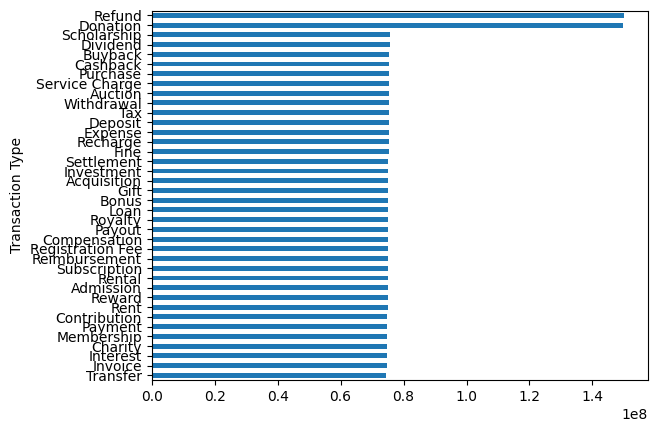

In [ ]:
groupbytransctype['Transaction Amount'].sum().sort_values().plot(kind = 'barh')

Obviously Refund and Donation will have the most total transactions

## Device Type

The Number unique varables are 38
The unique varables are ['GPS Device' 'Medical Device' 'Vehicle Infotainment System' 'Kiosk'
 'Smart Mirror' 'Smart Doorbell' 'Smart Speaker' 'Desktop'
 'Home Security System' 'POS Terminal' 'Cash Register' 'Tablet'
 'Wearable Device' 'Home Automation Hub' 'Industrial Controller' 'ATM'
 'Smart Thermostat' 'Barcode Scanner' 'Server' 'Virtual Reality Headset'
 'E-Reader' 'Smartphone' 'Smartwatch' 'Smart TV' 'Mobile' 'Digital Camera'
 'Robot' 'Laptop' 'Fitness Tracker' 'Smart Lock' 'Gaming Console'
 'Embedded System' 'IoT Device' 'Vending Machine' 'Self-Checkout Kiosk'
 'Drone' 'Smart Appliance' 'Augmented Reality Glasses']


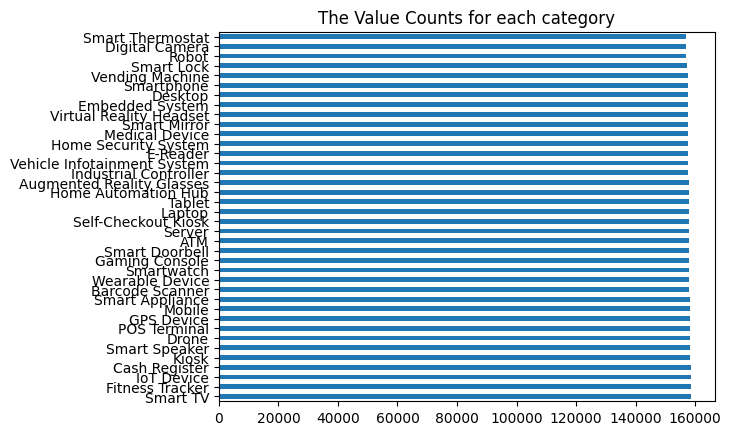

Fraudulent Flag,0,1,Percentage
Device Type,,,
Medical Device,79339,78385,50.30
Desktop,79084,78523,50.18
Embedded System,79108,78525,50.18
Vending Machine,79021,78526,50.16
Cash Register,79468,78996,50.15


Fraudulent Flag,0,1,Percentage
Device Type,,,
Digital Camera,78319,78709,49.88
Smart Mirror,78610,79082,49.85
Wearable Device,78738,79367,49.80
Smartwatch,78625,79462,49.74
Smartphone,78337,79226,49.72


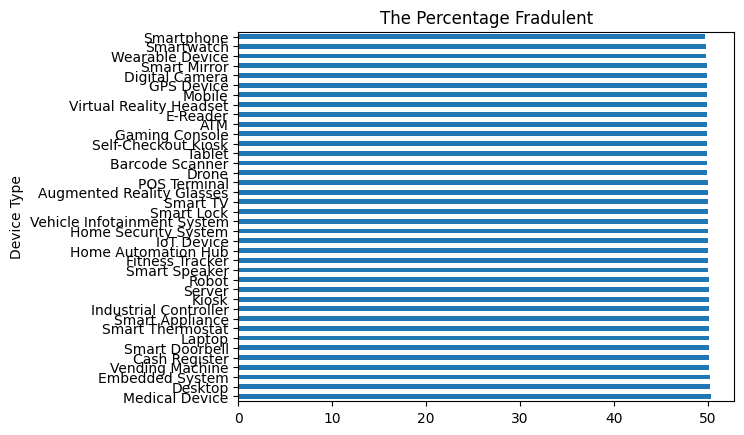

In [ ]:
ExploreCategorical(df, 'Device Type')

## IP Address

In [ ]:
df_IP = pd.DataFrame()

In [ ]:
IPsplitted = df['IP Address'].str.split('.')
df_IP["Part 1"] = IPsplitted.apply(lambda x: x[0])
df_IP["Part 2"] = IPsplitted.apply(lambda x: x[1])
df_IP["Part 3"] = IPsplitted.apply(lambda x: x[2])
df_IP["Part 4"] = IPsplitted.apply(lambda x: x[3])

In [ ]:
df_IP["Fraudulent Flag"] = df['Fraudulent Flag']

The Number unique varables are 256
The unique varables are ['42' '39' '243' '212' '166' '105' '142' '187' '84' '2' '206' '224' '245'
 '145' '115' '62' '169' '233' '18' '85' '128' '203' '73' '200' '113' '171'
 '96' '220' '248' '129' '162' '21' '51' '9' '221' '37' '68' '255' '14'
 '176' '152' '12' '227' '101' '93' '207' '22' '241' '34' '29' '217' '160'
 '196' '24' '104' '134' '198' '95' '102' '79' '202' '130' '71' '165' '211'
 '141' '204' '70' '253' '109' '254' '67' '231' '81' '65' '164' '20' '80'
 '249' '64' '69' '180' '215' '27' '175' '66' '144' '195' '30' '89' '242'
 '76' '4' '26' '52' '55' '36' '31' '10' '45' '155' '159' '238' '244' '132'
 '47' '1' '35' '151' '168' '135' '100' '139' '172' '17' '228' '56' '23'
 '124' '186' '87' '46' '147' '133' '137' '107' '91' '190' '3' '188' '182'
 '235' '247' '11' '179' '103' '223' '41' '170' '208' '201' '25' '185'
 '251' '210' '28' '63' '90' '225' '193' '74' '192' '32' '181' '174' '78'
 '48' '177' '122' '15' '230' '240' '57' '163' '252' '119' '246

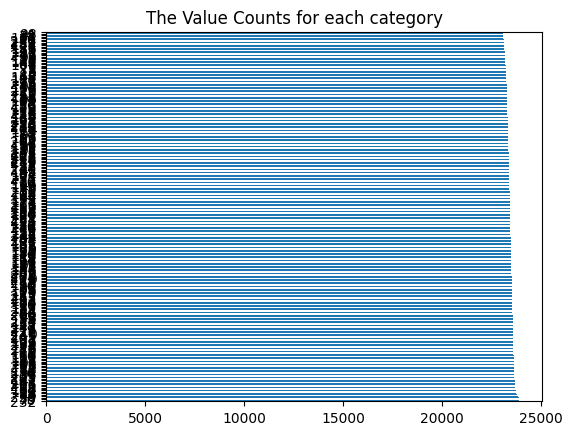

Fraudulent Flag,0,1,Percentage
Part 1,,,
120,11940,11562,50.80
118,11816,11449,50.79
34,11923,11566,50.76
28,11821,11490,50.71
245,11850,11520,50.71


Fraudulent Flag,0,1,Percentage
Part 1,,,
20,11661,11949,49.39
177,11659,11967,49.35
25,11612,11934,49.32
139,11552,11888,49.28
182,11573,11976,49.14


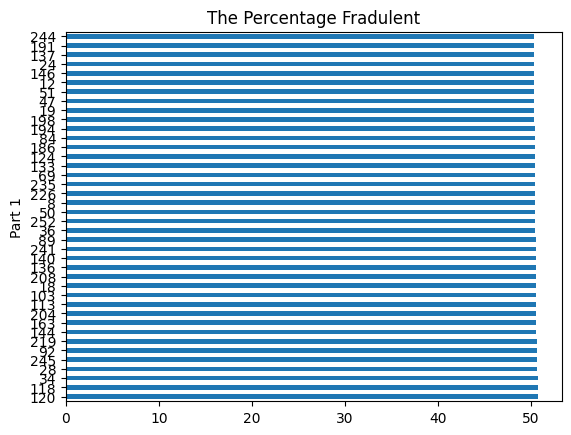

In [ ]:
ExploreCategorical(df_IP, 'Part 1')

The Number unique varables are 256
The unique varables are ['23' '52' '180' '186' '113' '127' '183' '28' '82' '60' '178' '240' '173'
 '46' '201' '4' '83' '151' '216' '93' '162' '160' '242' '248' '141' '43'
 '211' '91' '125' '48' '197' '18' '102' '246' '94' '96' '167' '20' '132'
 '234' '118' '97' '71' '169' '244' '225' '215' '17' '217' '239' '189' '64'
 '144' '39' '182' '41' '62' '206' '175' '159' '108' '14' '47' '158' '116'
 '80' '218' '154' '255' '203' '38' '233' '24' '137' '84' '128' '253' '156'
 '245' '16' '122' '205' '181' '230' '126' '170' '2' '49' '11' '212' '50'
 '213' '129' '191' '79' '30' '33' '89' '88' '12' '174' '251' '187' '26'
 '92' '223' '130' '13' '27' '36' '110' '165' '86' '0' '208' '176' '107'
 '224' '51' '90' '210' '105' '196' '136' '100' '59' '236' '35' '111' '188'
 '214' '232' '168' '66' '9' '31' '101' '237' '247' '1' '120' '221' '65'
 '146' '235' '249' '112' '133' '109' '42' '123' '78' '19' '153' '7' '229'
 '57' '147' '179' '73' '61' '231' '104' '222' '199' '194' '

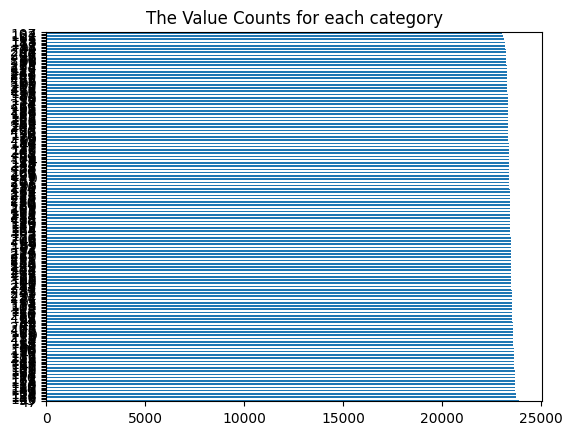

Fraudulent Flag,0,1,Percentage
Part 2,,,
120,12058,11677,50.80
214,11835,11481,50.76
72,11930,11611,50.68
92,11811,11495,50.68
145,11898,11580,50.68


Fraudulent Flag,0,1,Percentage
Part 2,,,
165,11563,11882,49.32
68,11623,11947,49.31
154,11587,11940,49.25
222,11551,11966,49.12
130,11486,11916,49.08


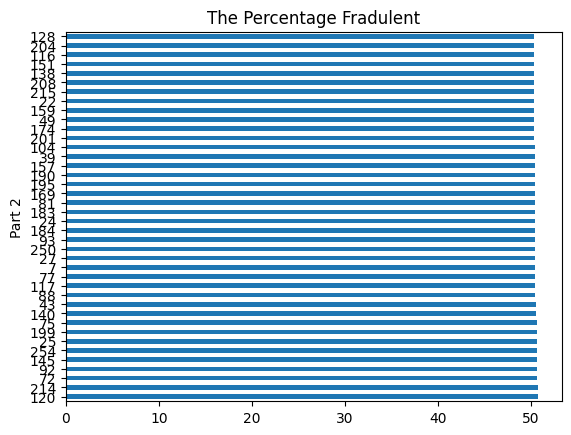

In [ ]:
ExploreCategorical(df_IP, 'Part 2')

In [ ]:
ExploreCategorical(df_IP, 'Part 1')


## "User's Device Location"

The Number unique varables are 40
The unique varables are ['United Kingdom' 'Mexico' 'Qatar' 'Spain' 'Israel' 'South Africa'
 'Canada' 'Australia' 'Singapore' 'China' 'Switzerland' 'Sweden' 'Germany'
 'Nigeria' 'Norway' 'New Zealand' 'Belgium' 'Indonesia' 'South Korea'
 'Japan' 'Turkey' 'Taiwan' 'Argentina' 'United States' 'Russia'
 'Netherlands' 'Hong Kong' 'United Arab Emirates' 'Thailand' 'Egypt'
 'Saudi Arabia' 'Vietnam' 'Austria' 'Malaysia' 'Italy' 'Brazil' 'Poland'
 'Greece' 'France' 'India']


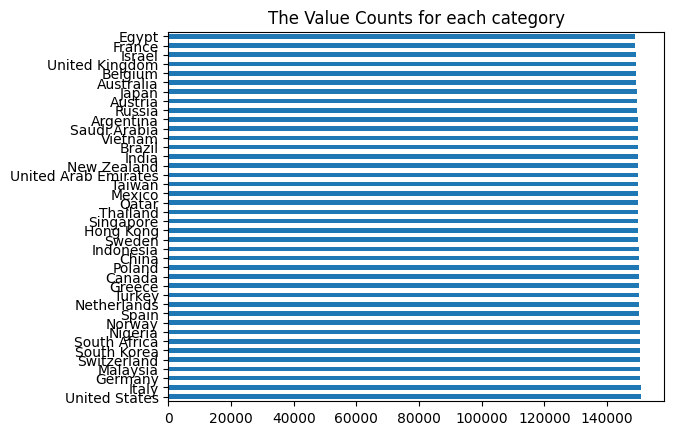

Fraudulent Flag,0,1,Percentage
User's Device Location,,,
India,75251,74624,50.21
Netherlands,75488,74911,50.19
Nigeria,75429,75013,50.14
Argentina,75121,74697,50.14
Hong Kong,75217,74818,50.13


Fraudulent Flag,0,1,Percentage
User's Device Location,,,
Norway,74985,75440,49.85
Taiwan,74684,75270,49.80
France,74180,74810,49.79
South Korea,74929,75578,49.78
Brazil,74559,75312,49.75


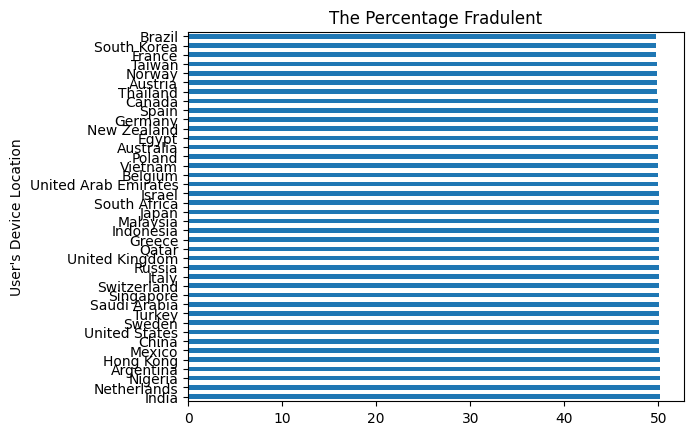

In [ ]:
ExploreCategorical(df, "User's Device Location")

In [ ]:
import country_converter as coco
standard_names = coco.convert(names=df["Country Code"].unique(), to='name_short')

['South Korea', 'Vietnam', 'Mexico', 'Singapore', 'Hong Kong', 'Thailand', 'Switzerland', 'Canada', 'not found', 'Qatar', 'Japan', 'United States', 'Brazil', 'Indonesia', 'Egypt', 'not found', 'Belgium', 'Austria', 'India', 'New Zealand', 'Nigeria', 'Spain', 'Saudi Arabia', 'Israel', 'not found', 'United Kingdom', 'Netherlands', 'Sweden', 'France', 'Australia', 'Argentina', 'not found', 'China', 'Norway', 'Türkiye', 'Russia', 'Italy', 'Poland', 'not found', 'South Africa']


In [ ]:
df["User's Device Location"].unique()

array(['United Kingdom', 'Mexico', 'Qatar', 'Spain', 'Israel',
       'South Africa', 'Canada', 'Australia', 'Singapore', 'China',
       'Switzerland', 'Sweden', 'Germany', 'Nigeria', 'Norway',
       'New Zealand', 'Belgium', 'Indonesia', 'South Korea', 'Japan',
       'Turkey', 'Taiwan', 'Argentina', 'United States', 'Russia',
       'Netherlands', 'Hong Kong', 'United Arab Emirates', 'Thailand',
       'Egypt', 'Saudi Arabia', 'Vietnam', 'Austria', 'Malaysia', 'Italy',
       'Brazil', 'Poland', 'Greece', 'France', 'India'], dtype=object)

In [ ]:
pairs = {values: index for index, values in zip(standard_names, df["Country Code"].unique())}
pairs["TAI"] = "Taiwan"
pairs["GER"] = "Germany"
pairs["UAE"] = "United Arab Emirates"
pairs["MAL"] = "Malaysia"
pairs["GRE"] = "Greece"

In [ ]:
df["Country Code"] = df["Country Code"].apply(lambda x: pairs[x])

In [ ]:
df["Same Country Code"] = df["Country Code"] == df["User's Device Location"]

The Number unique varables are 2
The unique varables are [False  True]


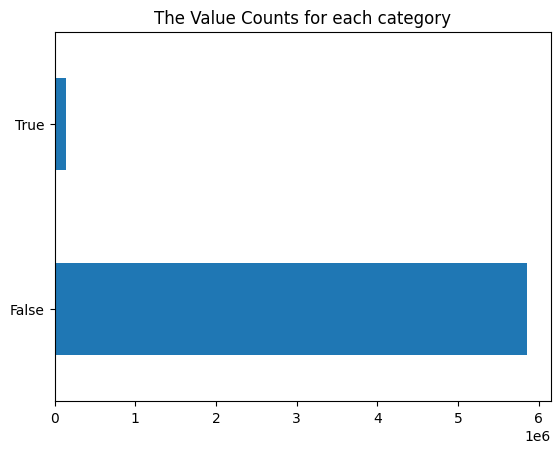

Fraudulent Flag,0,1,Percentage
Same Country Code,,,
False,2927502,2926566,50.01
True,72592,73340,49.74


Fraudulent Flag,0,1,Percentage
Same Country Code,,,
False,2927502,2926566,50.01
True,72592,73340,49.74


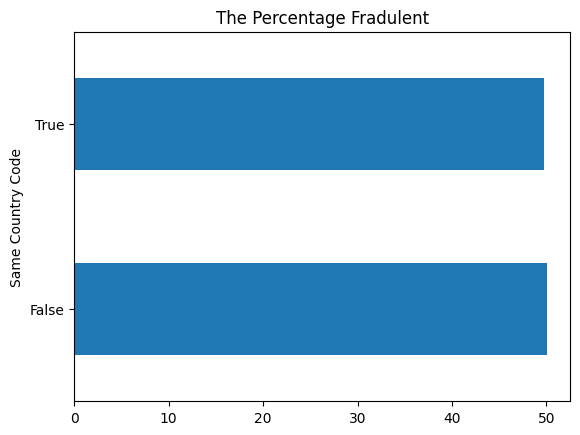

In [ ]:
ExploreCategorical(df, "Same Country Code")

## Transaction Currency

The Number unique varables are 40
The unique varables are ['NOK' 'EGP' 'MXN' 'CLP' 'RUB' 'BRL' 'AUD' 'HKD' 'THB' 'KRW' 'RON' 'CAD'
 'USD' 'QAR' 'GBP' 'PLN' 'CNY' 'COP' 'TRY' 'SEK' 'SAR' 'ILS' 'PEN' 'DKK'
 'NZD' 'VND' 'EUR' 'MYR' 'AED' 'CZK' 'CHF' 'ARS' 'HUF' 'PHP' 'IDN' 'ZAR'
 'SGD' 'KES' 'INR' 'JPY']


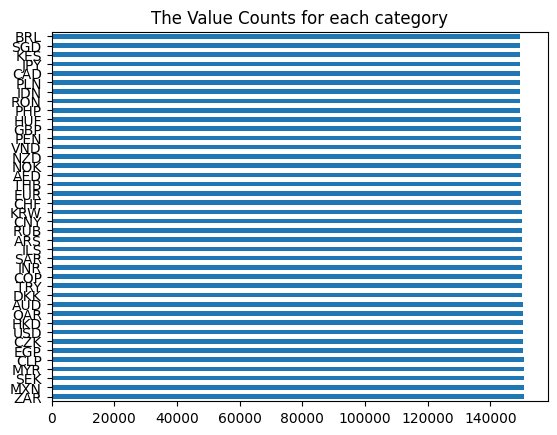

Fraudulent Flag,0,1,Percentage
Transaction Currency,,,
ILS,75462,74604,50.29
BRL,75078,74245,50.28
INR,75412,74735,50.23
EGP,75592,74933,50.22
MYR,75597,75025,50.19


Fraudulent Flag,0,1,Percentage
Transaction Currency,,,
ARS,74772,75264,49.84
JPY,74485,74991,49.83
CZK,74993,75527,49.82
RUB,74691,75321,49.79
DKK,74649,75595,49.69


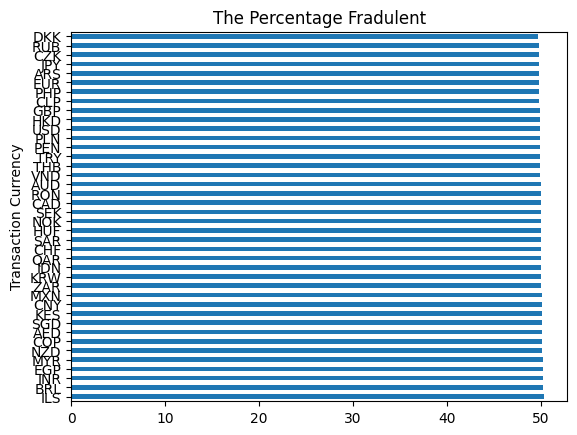

In [ ]:
ExploreCategorical(df, "Transaction Currency")

In [ ]:
currency_countries = {
    'NOK': 'Norway',
    'EGP': 'Egypt',
    'MXN': 'Mexico',
    'CLP': 'Chile',
    'RUB': 'Russia',
    'BRL': 'Brazil',
    'AUD': 'Australia',
    'HKD': 'Hong Kong',
    'THB': 'Thailand',
    'KRW': 'South Korea',
    'RON': 'Romania',
    'CAD': 'Canada',
    'USD': 'United States of America',
    'QAR': 'Qatar',
    'GBP': 'United Kingdom',
    'PLN': 'Poland',
    'CNY': 'China',
    'COP': 'Colombia',
    'TRY': 'Turkey',
    'SEK': 'Sweden',
    'SAR': 'Saudi Arabia',
    'ILS': 'Israel',
    'PEN': 'Peru',
    'DKK': 'Denmark',
    'NZD': 'New Zealand',
    'VND': 'Vietnam',
    'EUR': 'Eurozone countries',
    'MYR': 'Malaysia',
    'AED': 'United Arab Emirates',
    'CZK': 'Czech Republic',
    'CHF': 'Switzerland',
    'ARS': 'Argentina',
    'HUF': 'Hungary',
    'PHP': 'Philippines',
    'IDN': 'Indonesia',
    'ZAR': 'South Africa',
    'SGD': 'Singapore',
    'KES': 'Kenya',
    'INR': 'India',
    'JPY': 'Japan'
}

In [ ]:
df["Country Currency"] = df["Transaction Currency"].apply(lambda x: currency_countries[x])

The Number unique varables are 2
The unique varables are [False  True]


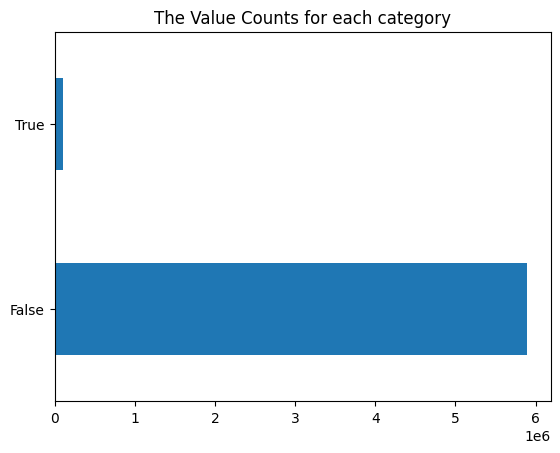

Fraudulent Flag,0,1,Percentage
Same Currency Device Location,,,
False,2945875,2945664,50.00
True,54219,54242,49.99


Fraudulent Flag,0,1,Percentage
Same Currency Device Location,,,
False,2945875,2945664,50.00
True,54219,54242,49.99


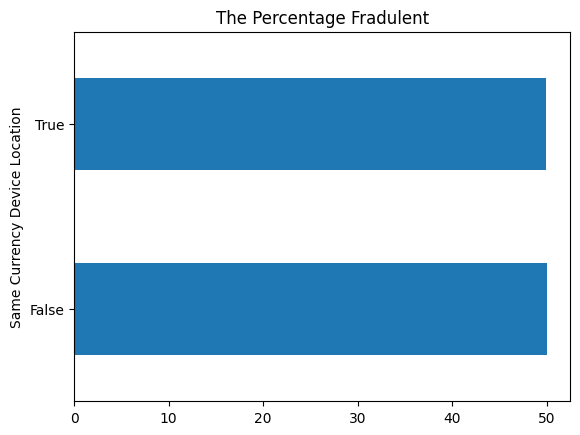

In [ ]:
df["Same Currency Device Location"] = (df["Country Currency"] == df["User's Device Location"])
ExploreCategorical(df, "Same Currency Device Location")

The Number unique varables are 2
The unique varables are [False  True]


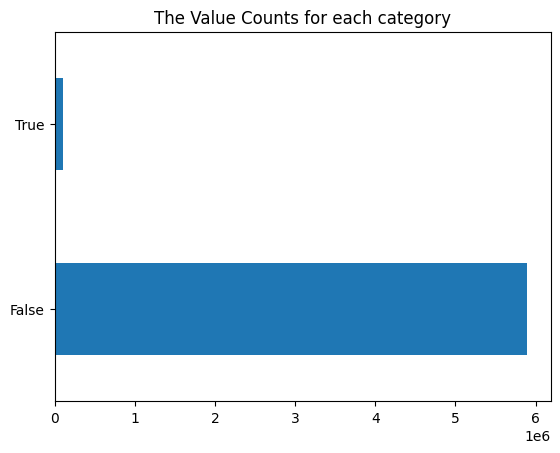

Fraudulent Flag,0,1,Percentage
Same Currency Device Location,,,
False,2945875,2945664,50.00
True,54219,54242,49.99


Fraudulent Flag,0,1,Percentage
Same Currency Device Location,,,
False,2945875,2945664,50.00
True,54219,54242,49.99


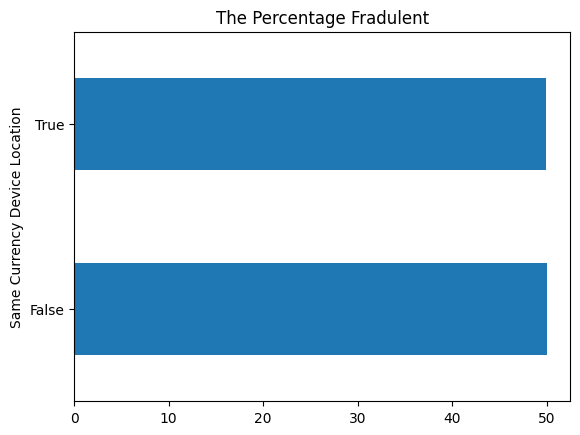

In [ ]:
df["Same Currency Country Code"] = (df["Country Currency"] == df["Country Code"])
ExploreCategorical(df, "Same Currency Device Location")

## Transaction Status

The Number unique varables are 40
The unique varables are ['In Transit' 'Resolved' 'Posted' 'Closed' 'Refunded' 'Approved'
 'Cancelled' 'Partially Declined' 'Void' 'Sent' 'Cleared' 'Processing'
 'Disputed' 'Transferred' 'In Progress' 'Debit' 'Rejected' 'Unverified'
 'Held for Security' 'Pending Review' 'Authorized' 'Executed' 'Error'
 'Awaiting Verification' 'Pending' 'Pending Payment' 'Blocked' 'Settled'
 'Pending Confirmation' 'Failed' 'Credited' 'Received'
 'Partially Approved' 'Delivered' 'Processed' 'Hold' 'Verified' 'Declined'
 'Under Review' 'Completed']


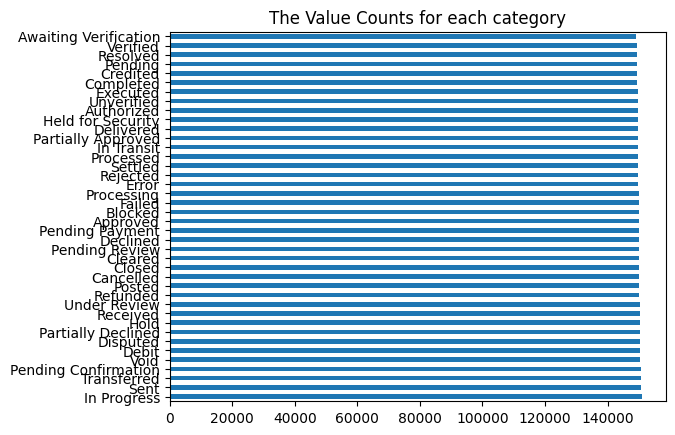

Fraudulent Flag,0,1,Percentage
Transaction Status,,,
Approved,75314,74697,50.21
Sent,75623,75040,50.19
Transferred,75583,75028,50.18
Held for Security,75098,74650,50.15
Posted,75252,74836,50.14


Fraudulent Flag,0,1,Percentage
Transaction Status,,,
Authorized,74629,75053,49.86
Pending Payment,74766,75246,49.84
Verified,74374,74898,49.82
Under Review,74745,75487,49.75
Pending Confirmation,74884,75654,49.74


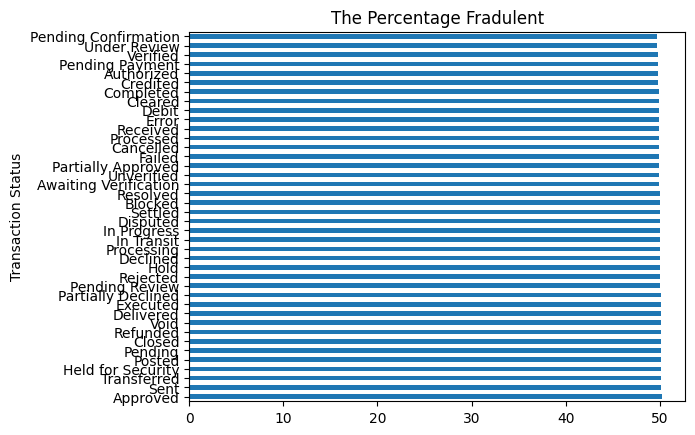

In [ ]:
ExploreCategorical(df, "Transaction Status")

## Transaction Time of Day

The Number unique varables are 3
The unique varables are ['Daytime' 'Evening' 'Nighttime']


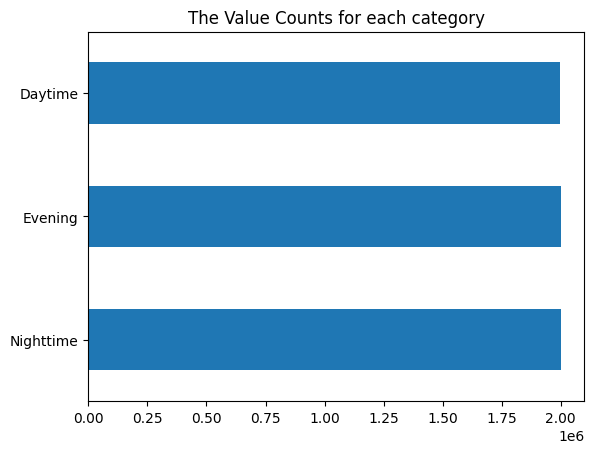

Fraudulent Flag,0,1,Percentage
Transaction Time of Day,,,
Nighttime,1001116,1000064,50.03
Daytime,999496,999099,50.01
Evening,999482,1000743,49.97


Fraudulent Flag,0,1,Percentage
Transaction Time of Day,,,
Nighttime,1001116,1000064,50.03
Daytime,999496,999099,50.01
Evening,999482,1000743,49.97


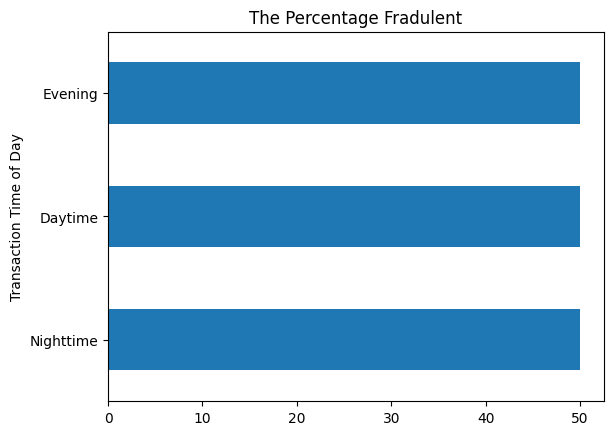

In [ ]:
ExploreCategorical(df, "Transaction Time of Day")

## User's Email Domain

The Number unique varables are 40
The unique varables are ['cox.co.uk' 'gmail.com' 'rocketmail.com' 'roadrunner.co.uk'
 'protonmail.co.uk' 'verizon.co.uk' 'yahoo.co.uk' 'verizon.net'
 'gmail.co.uk' 'hotmail.com' 'outlook.com' 'tutanota.com' 'icloud.co.uk'
 'zoho.com' 'cox.net' 'aim.com' 'yandex.com' 'rocketmail.co.uk'
 'icloud.com' 'outlook.co.uk' 'zoho.co.uk' 'aim.co.uk' 'fastmail.co.uk'
 'gmail.ca' 'rediffmail.co.uk' 'yahoo.co.in' 'fastmail.com' 'yahoo.ca'
 'yandex.co.uk' 'gmx.com' 'live.co.uk' 'roadrunner.com' 'protonmail.com'
 'live.com' 'gmail.co.in' 'rediffmail.com' 'mail.com' 'tutanota.co.uk'
 'yahoo.com' 'aol.com']


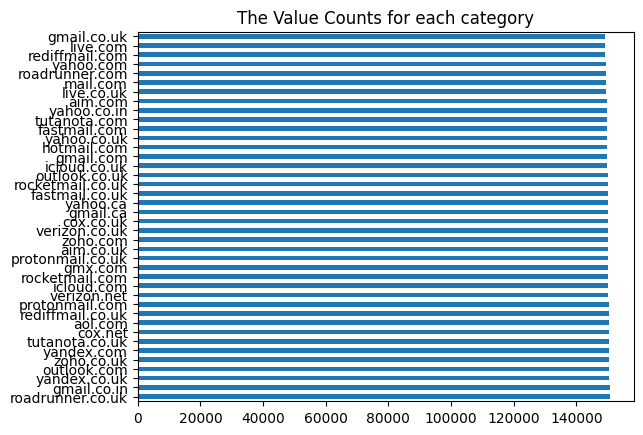

Fraudulent Flag,0,1,Percentage
User's Email Domain,,,
rocketmail.com,75637,74582,50.35
verizon.co.uk,75563,74553,50.34
aim.com,75204,74545,50.22
mail.com,75005,74390,50.21
gmail.co.uk,74818,74247,50.19


Fraudulent Flag,0,1,Percentage
User's Email Domain,,,
rocketmail.co.uk,74718,75246,49.82
fastmail.com,74630,75176,49.82
outlook.com,74981,75548,49.81
live.com,74301,74862,49.81
icloud.co.uk,74624,75319,49.77


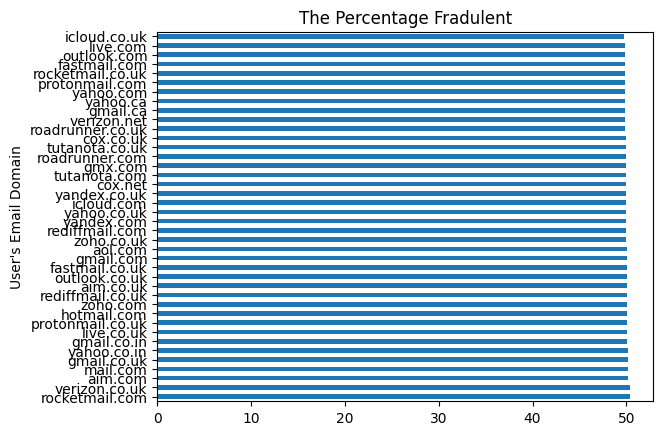

In [ ]:
ExploreCategorical(df, "User's Email Domain")

## Transaction Authentication Method

The Number unique varables are 39
The unique varables are ['Bluetooth Authentication' 'NFC Tag' 'Token' 'Time-Based OTP' 'Password'
 'Transaction Confirmation Number' 'CAPTCHA' 'Security Question'
 'Hardware Token' 'Signature Verification' 'Iris Scan'
 'Push Notification Confirmation' 'Certificate-based Authentication'
 'Pattern Lock' 'Smart Card' 'SMS Code' 'Behavioral Biometrics'
 'Biometric Scan' 'Knowledge-Based Authentication' 'Voiceprint'
 'Mobile Phone Verification' 'QR Code' 'Face ID' 'PIN'
 'Two-Factor Authentication' 'Biometric Card'
 'Radio-Frequency Identification (RFID)' 'Social Media Login'
 'Behavioral Analytics' 'Handwriting Recognition' 'Palm Vein Scan'
 'Mobile App Notification' 'Authentication App' 'Geolocation Verification'
 'USB Security Key' 'Fingerprint' 'Email Verification' 'Voice Recognition'
 'Retina Scan']


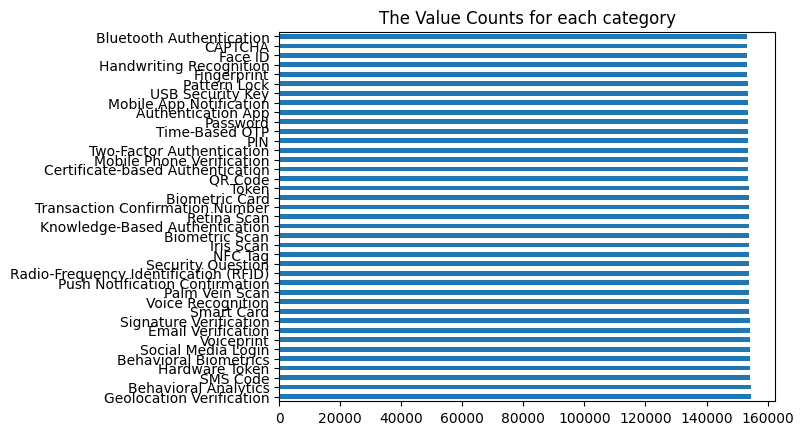

Fraudulent Flag,0,1,Percentage
Transaction Authentication Method,,,
Biometric Card,77314,76526,50.26
Social Media Login,77352,76799,50.18
Geolocation Verification,77595,77133,50.15
Retina Scan,77130,76726,50.13
Handwriting Recognition,76902,76495,50.13


Fraudulent Flag,0,1,Percentage
Transaction Authentication Method,,,
Mobile App Notification,76553,77058,49.84
Certificate-based Authentication,76591,77088,49.84
Token,76640,77196,49.82
USB Security Key,76443,77039,49.81
Smart Card,76398,77671,49.59


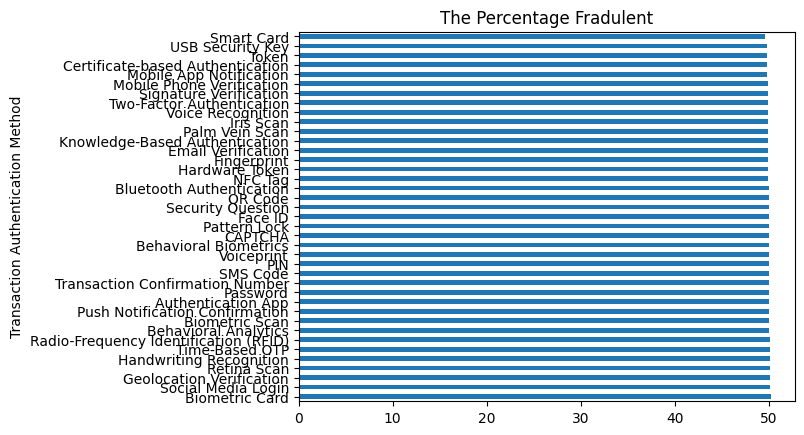

In [ ]:
ExploreCategorical(df, "Transaction Authentication Method")

## Merchant's Business Age

The Number unique varables are 20
The unique varables are [ 3 13  7 15 17 19  6 11  4 14 20  1  5  2  8  9 12 16 10 18]


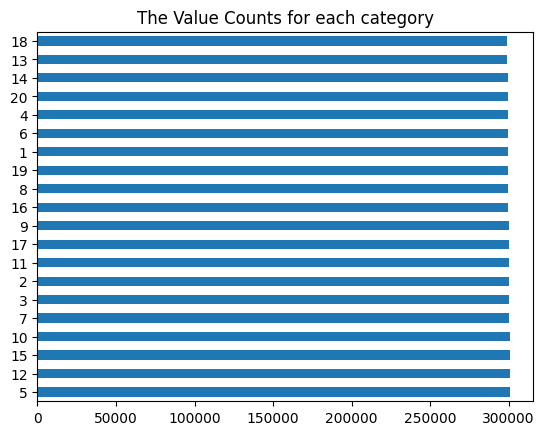

Fraudulent Flag,0,1,Percentage
Merchant's Business Age,,,
14,150259,149094,50.19
18,149957,149138,50.14
4,150188,149354,50.14
8,150212,149682,50.09
7,150493,150009,50.08


Fraudulent Flag,0,1,Percentage
Merchant's Business Age,,,
10,150001,150606,49.90
6,149390,150181,49.87
20,149299,150103,49.87
9,149626,150445,49.86
19,149440,150266,49.86


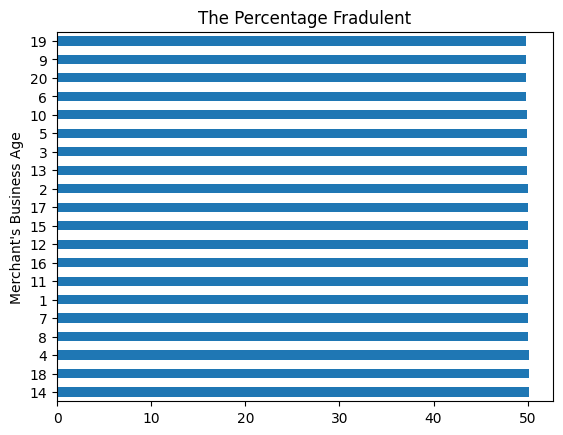

In [ ]:
ExploreCategorical(df, "Merchant's Business Age")

In [ ]:
df["Merchant's Business Age"].max()

20

## Transaction Purpose

The Number unique varables are 38
The unique varables are ['Consultation Fee' 'Cashback Reward' 'Acquisition' 'Loan Repayment'
 'Dividend Reinvestment' 'Service Charge' 'Rent' 'Retail Purchase'
 'Donation to Nonprofit' 'Buyback' 'Charity Donation' 'Investment'
 'Ticket Purchase' 'Utility Payment' 'Bonus' 'Scholarship'
 'Subscription Renewal' 'Rental Payment' 'Membership' 'Tax Payment'
 'Deposit' 'Bill Payment' 'Admission' 'Registration Fee' 'Fine Settlement'
 'Auction Bid' 'Transfer to Family' 'Settlement' 'Gift Purchase'
 'Product Purchase' 'Insurance Premium' 'Royalty' 'Payout' 'Compensation'
 'Interest Payment' 'Recharge' 'Invoice Payment' 'Expense Reimbursement']


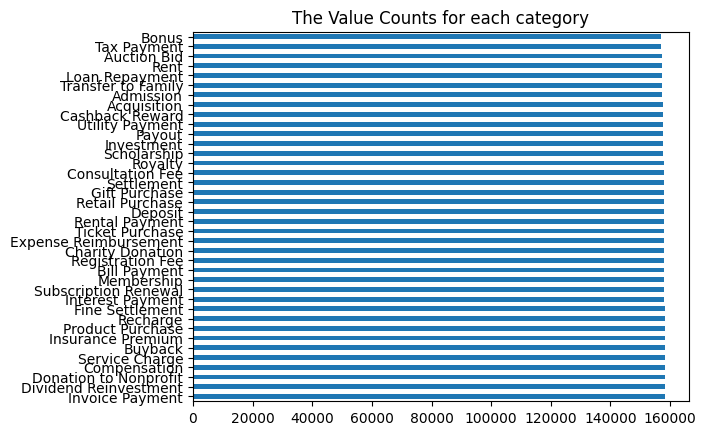

Fraudulent Flag,0,1,Percentage
Transaction Purpose,,,
Investment,79202,78569,50.20
Admission,78974,78410,50.18
Deposit,79269,78717,50.17
Subscription Renewal,79292,78800,50.16
Fine Settlement,79310,78849,50.15


Fraudulent Flag,0,1,Percentage
Transaction Purpose,,,
Rent,78449,78886,49.86
Buyback,78869,79419,49.83
Interest Payment,78736,79381,49.80
Royalty,78507,79342,49.74
Acquisition,78157,79367,49.62


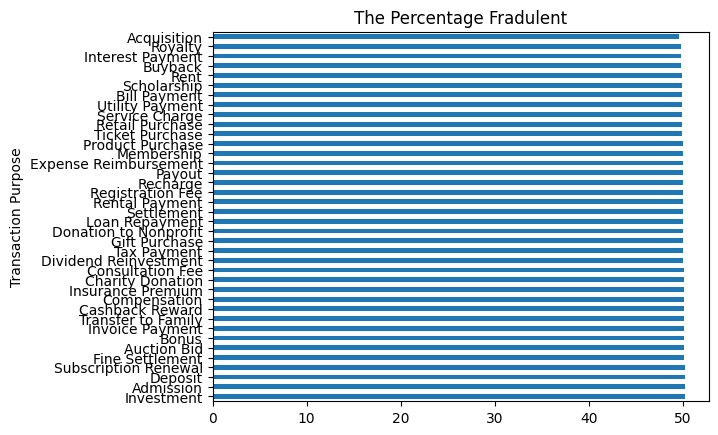

In [ ]:
ExploreCategorical(df, "Transaction Purpose")

## User's Credit Score  

<Axes: >

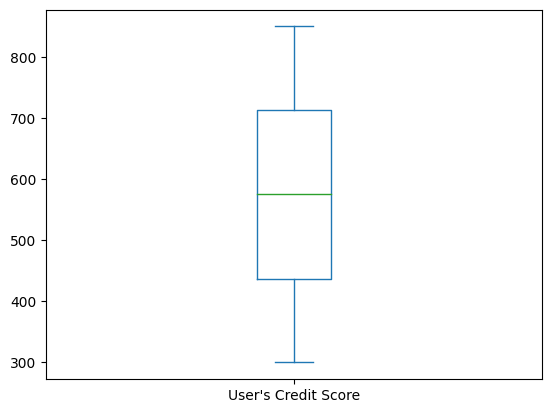

In [ ]:
df["User's Credit Score"].plot(kind = 'box')

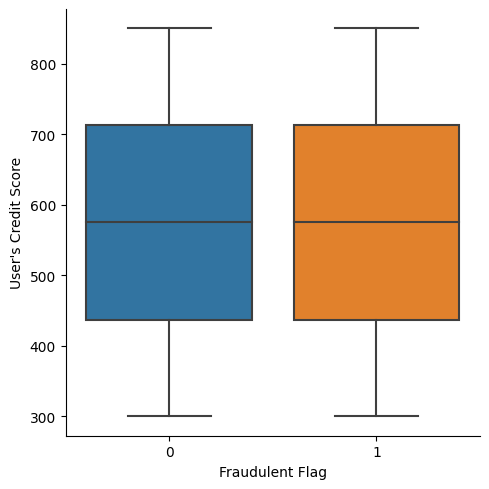

In [ ]:
sns.catplot(data=df, x="Fraudulent Flag", y="User's Credit Score", kind="box")

##  Merchant's Reputation Score

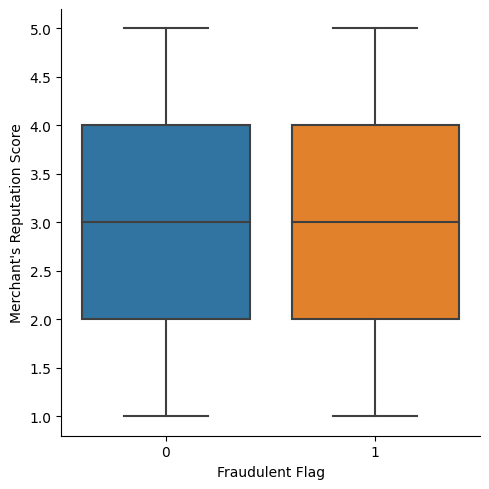

In [ ]:
sns.catplot(data=df, x="Fraudulent Flag", y="Merchant's Reputation Score", kind="box")

## User Income

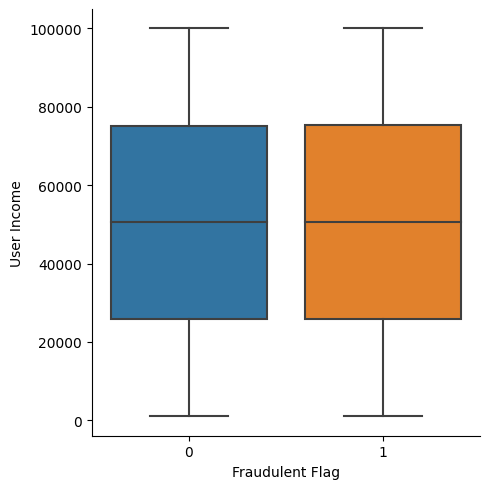

In [ ]:
sns.catplot(data=df, x="Fraudulent Flag", y="User Income", kind="box")

The Number unique varables are 2
The unique varables are [False  True]


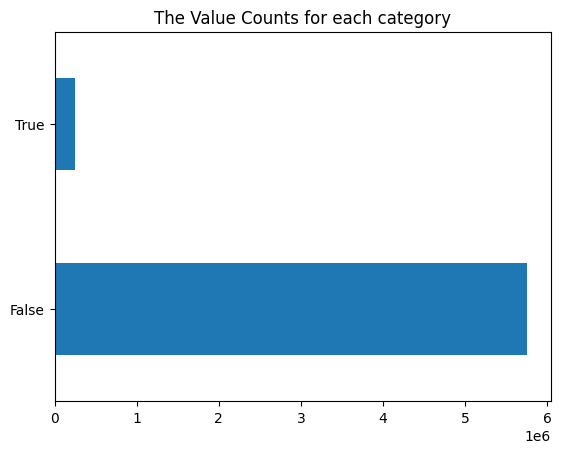

Fraudulent Flag,0,1,Percentage
Transaction>2,,,
True,123242,122689,50.11
False,2876852,2877217,50.00


Fraudulent Flag,0,1,Percentage
Transaction>2,,,
True,123242,122689,50.11
False,2876852,2877217,50.00


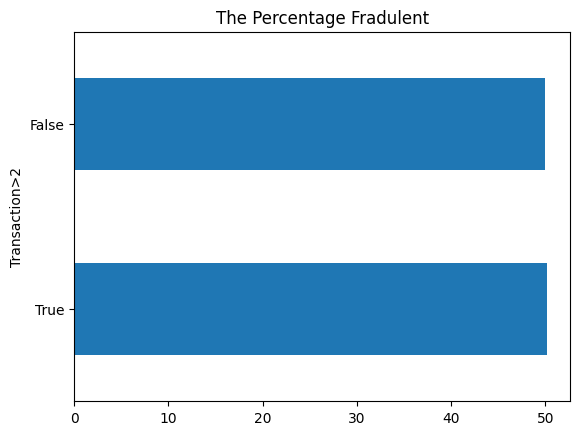

In [ ]:
df["Transaction>2"] = df["Transaction Amount"] > df["User Income"] / 10
ExploreCategorical(df, "Transaction>2")

# Lets look for an optimal way to split the dataset

In [ ]:
dftypes  = df.dtypes

objectdata = dftypes[dftypes == 'object'].index
objectdata

Index(['Transaction Date and Time', 'Payment Method', 'Country Code',
       'Transaction Type', 'Device Type', 'IP Address', 'Browser Type',
       'Operating System', 'Merchant Category', 'User Occupation',
       'User Gender', 'User Account Status', 'Transaction Status',
       'Transaction Time of Day', 'User's Device Location',
       'Transaction Currency', 'Transaction Purpose', 'User's Email Domain',
       'Transaction Authentication Method'],
      dtype='object')

In [ ]:
objectdata = ['Transaction Type', 'Device Type', 'Browser Type',
       'Operating System', 'Merchant Category', 'User Occupation',
       'User Gender', 'User Account Status', 'Transaction Status',
       'Transaction Time of Day', "User's Device Location",
       'Transaction Currency', 'Transaction Purpose',
       'Transaction Authentication Method']

In [ ]:
df.corr()['Fraudulent Flag'].mean()

<ipython-input-7-fd7f4a1877cc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Fraudulent Flag'].mean()


0.07697159718908611

## ARG

In [ ]:
categorical_variable = ['Payment Method', 'Country Code',
       'Transaction Type', 'Device Type', 'Browser Type',
       'Operating System', 'Merchant Category', 'User Occupation',
       'User Gender', 'User Account Status', 'Transaction Status',
       'Transaction Time of Day', "User's Device Location",
       'Transaction Currency', 'Transaction Purpose', "User's Email Domain",
       'Transaction Authentication Method', "Merchant ID"]

In [ ]:
part = 'Transaction Type'
Countriesinfo = dict()

for Country in df[part].unique():
  Countdf = df[df[part] == Country]
  Countriesinfo[Country] = {"relatable": []}
  for variable in categorical_variable:
    percentage = get_classpercentage(Countdf, variable, 'Fraudulent Flag')["Percentage"]
    if percentage.min() < 45.0 or percentage.max() > 55.0:
      Countriesinfo[Country]["relatable"].append(variable)

In [ ]:
Countriesinfo

## Which Transaction occurs in each Country

In [ ]:
CountryCode_DeviceType = df.groupby(['Country Code'])['Device Type'].value_counts().unstack().reset_index()

In [ ]:
CountryCode_D

Device Type,Country Code,ATM,Augmented Reality Glasses,Barcode Scanner,Cash Register,Desktop,Digital Camera,Drone,E-Reader,Embedded System,...,Smart Speaker,Smart TV,Smart Thermostat,Smartphone,Smartwatch,Tablet,Vehicle Infotainment System,Vending Machine,Virtual Reality Headset,Wearable Device
0,ARG,4046,3903,3910,4099,3969,3903,3979,4000,3982,...,4017,3875,4026,3909,3901,3966,4030,3942,3934,3947
1,AUS,3942,4048,3796,3954,4041,3887,3844,3884,3993,...,3919,3998,3953,3890,3887,4119,3948,4010,3950,3904
2,AUT,3893,3941,4105,3899,4049,3929,4069,4024,3995,...,3965,4000,3944,3936,4026,3945,3933,3847,3988,3889
3,BEL,4030,3859,3899,4008,3998,3894,3998,3953,3918,...,3928,3955,3934,4010,4013,4015,3945,3918,4068,4058
4,BRA,3925,3855,4006,4004,3971,4098,3867,3734,3833,...,3974,3996,3937,4055,3972,3933,3847,3943,4050,3993
5,CAN,3891,3899,4061,4012,3969,3901,3935,3943,3979,...,4066,3948,3965,3981,3901,3855,3821,3875,3980,3871
6,CHE,3944,3906,3926,3987,4008,3904,3900,3952,3891,...,3928,3987,3841,3943,4050,3977,3837,3842,3972,3971
7,CHN,4060,3866,3990,3892,3970,3765,3963,4000,3897,...,3869,4038,3960,3965,3859,3955,4010,3969,3977,3979
8,EGY,3941,3908,3919,3952,3860,3938,3973,3875,3946,...,3897,3997,3785,3952,3965,3988,3935,3917,3924,3886
9,ESP,3946,3952,3958,3974,3938,3895,3964,3897,3876,...,3915,3970,3916,3874,3923,3956,3936,4049,3902,3912


## Feature Engineering

to drop Transaction Date and Time, Country, Device Type

to_percentageencode: Payment Method

to Label Encode = Merchant ID

to Hot Encode = Transaction Type